## Build a model to find whether the person is defaulter or not when income & balance of the person is provided


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/ADMIN/Desktop/FBS/Data Science/Data sets/Default.csv')

In [3]:
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
dataset['default'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
dataset['default'].nunique()

2

In [6]:
dataset['default'].count()

np.int64(10000)

In [7]:
dataset['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='Count'>

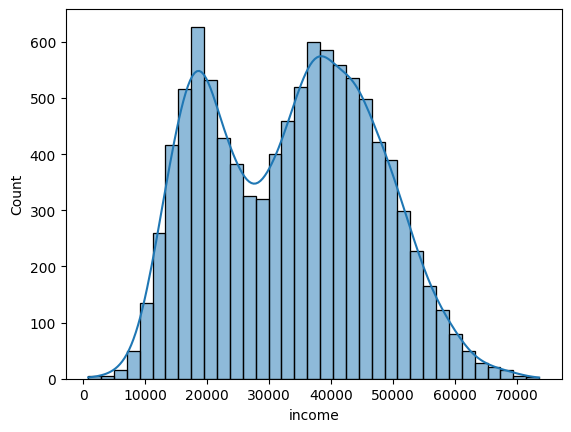

In [8]:
sns.histplot(dataset,x="income",kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x164d02f7200>,
 'caps': [<matplotlib.lines.Line2D at 0x164d2330500>,
 'boxes': [<matplotlib.lines.Line2D at 0x164d02f7e60>],
 'medians': [<matplotlib.lines.Line2D at 0x164d2330a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x164d2330d40>],
 'means': []}

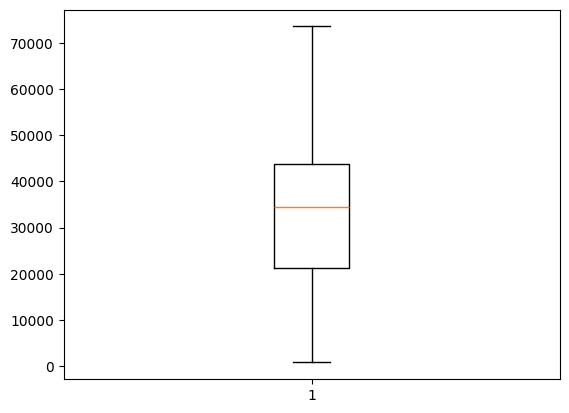

In [9]:
plt.boxplot(dataset['income'])

<Axes: xlabel='balance', ylabel='Count'>

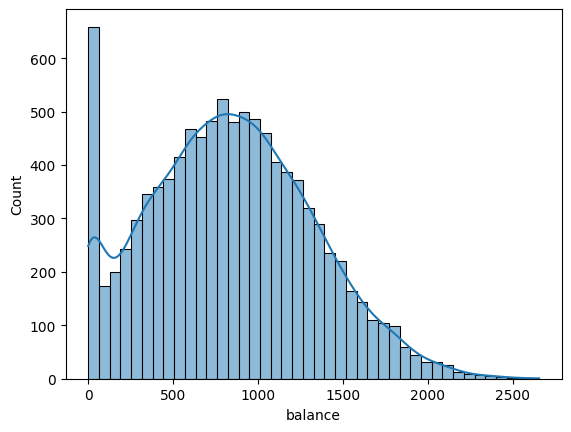

In [10]:
sns.histplot(dataset,x="balance",kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x164d242f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x164d242fa70>,
 'boxes': [<matplotlib.lines.Line2D at 0x164d242f230>],
 'medians': [<matplotlib.lines.Line2D at 0x164d35a8050>],
 'fliers': [<matplotlib.lines.Line2D at 0x164d35a82f0>],
 'means': []}

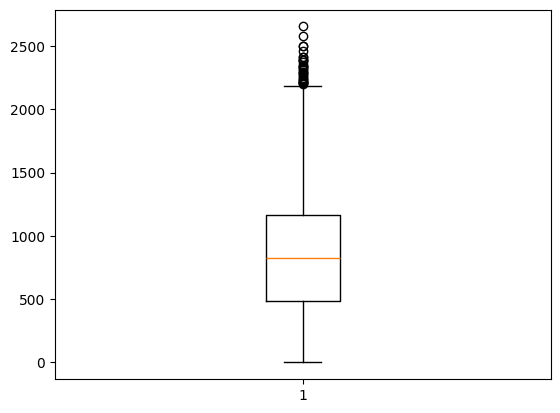

In [11]:
plt.boxplot(dataset['balance'])

In [12]:
q1 = dataset['balance'].quantile(0.25)

In [13]:
q3 = dataset['balance'].quantile(0.75)

In [14]:
IQR = q3-q1
IQR

np.float64(684.5772817)

In [15]:
upper = q3 + (IQR*1.5)
upper

np.float64(2193.1743093)

In [16]:
dataset[dataset['balance']>upper]['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [17]:
# dataset[dataset['balance']>upper]['default'] #the data having outliers for baalnce

In [18]:
# out_ind = dataset[dataset['balance']>=2500].index
# dataset.drop(out_ind,inplace=True)

In [19]:
 dataset.drop(dataset[dataset['balance']>=2500].index,inplace=True)

### Encoding

In [20]:
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['student']= le.fit_transform(dataset['student'])

In [22]:
dataset.head()

,default,student,balance,income
0,No,0,729.526495,44361.62507
1,No,1,817.180407,12106.13470
2,No,0,1073.549164,31767.13895
3,No,0,529.250605,35704.49394
4,No,0,785.655883,38463.49588


## Divide X & y

In [23]:
X = dataset.drop('default',axis=1)
y= dataset['default']

## tranformation / scaling

In [24]:
dataset.describe()

,student,balance,income
count,9997.000000,9997.000000,9997.000000
mean,0.294188,834.851794,33520.779654
std,0.455700,482.842711,13336.614728
min,0.000000,0.000000,771.967729
25%,0.000000,481.591003,21341.653840
50%,0.000000,823.471373,34558.615780
75%,1.000000,1165.936504,43809.259950
max,1.000000,2499.016750,73554.233500


In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_trans = ss.fit_transform(X)
x_trans

array([[-0.64560699, -0.21814675,  0.81290402],
       [ 1.54892994, -0.03660047, -1.60578352],
       [-0.64560699,  0.49438317, -0.13149727],
       ...,
       [-0.64560699,  0.02187198,  1.88328403],
       [-0.64560699,  1.52056553,  0.23607866],
       [ 1.54892994, -1.31297689, -1.24909213]], shape=(9997, 3))

In [26]:
X = pd.DataFrame(x_trans,columns=X.columns)
X

,student,balance,income
0,-0.645607,-0.218147,0.812904
1,1.548930,-0.036600,-1.605784
2,-0.645607,0.494383,-0.131497
3,-0.645607,-0.632952,0.163746
4,-0.645607,-0.101893,0.370631
...,...,...,...
9992,-0.645607,-0.255369,1.460084
9993,-0.645607,-0.159250,-1.039301
9994,-0.645607,0.021872,1.883284
9995,-0.645607,1.520566,0.236079


In [27]:
X.describe()

,student,balance,income
count,9.997000e+03,9.997000e+03,9.997000e+03
mean,-4.566607e-17,-6.681106e-17,-2.590705e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-6.456070e-01,-1.729121e+00,-2.455679e+00
25%,-6.456070e-01,-7.316636e-01,-9.132554e-01
50%,-6.456070e-01,-2.357080e-02,7.782245e-02
75%,1.548930e+00,6.857332e-01,7.714848e-01
max,1.548930e+00,3.446771e+00,3.001920e+00


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [29]:
### Build model

In [30]:
from sklearn.neighbors import KNeighborsClassifier


In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
test_pred = knn.predict(X_test)

In [33]:
from sklearn. metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [34]:
accuracy_score(y_test, test_pred)   #accuracy score

0.966

In [35]:
confusion_matrix(y_test,test_pred)

array([[2867,   33],
       [  69,   31]])

In [36]:
y_test.value_counts()   #actual classes counts

default
No     2900
Yes     100
Name: count, dtype: int64

In [37]:
pd.Series(test_pred).value_counts() #predicted classes conts

No     2936
Yes      64
Name: count, dtype: int64

In [38]:
matrix = pd.DataFrame({"Positive":[2867,64], "Negative":[33,31]})
matrix

,Positive,Negative
0,2867,33
1,64,31


In [39]:
prec_positive = precision_score(y_test,test_pred,pos_label='No')
prec_positive

0.9764986376021798

In [40]:
prec_negative = precision_score(y_test,test_pred,pos_label='Yes') 

In [41]:
prec_negative


0.484375

In [42]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.98      2900
         Yes       0.48      0.31      0.38       100

    accuracy                           0.97      3000
   macro avg       0.73      0.65      0.68      3000
weighted avg       0.96      0.97      0.96      3000



In [43]:
train_pred = knn.predict(X_train)

In [44]:
accuracy_score(y_train, train_pred)

0.9779905673860226

In [45]:
confusion_matrix(y_train,train_pred)

array([[6727,   40],
       [ 114,  116]])

In [46]:
y_train.value_counts()

default
No     6767
Yes     230
Name: count, dtype: int64

In [47]:
pd.Series(train_pred).value_counts()

No     6841
Yes     156
Name: count, dtype: int64

In [48]:
prec_positive = precision_score(y_train,train_pred,pos_label='No')
prec_positive

0.9833357696243239

In [49]:
prec_negative = precision_score(y_train,train_pred,pos_label='Yes')

In [50]:
prec_negative

0.7435897435897436

In [51]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      6767
         Yes       0.74      0.50      0.60       230

    accuracy                           0.98      6997
   macro avg       0.86      0.75      0.79      6997
weighted avg       0.98      0.98      0.98      6997



In [52]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [53]:
from imblearn.under_sampling import RandomUnderSampler


In [57]:
under = RandomUnderSampler()
under_x,under_y = under.fit_resample(X_train,y_train)
under_x_test, under_y_test = under.fit_resample(X_test,y_test)

In [58]:
under_y.value_counts()

default
No     230
Yes    230
Name: count, dtype: int64

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(under_x,under_y)
pred = knn.predict(under_x_test)
accuracy_score(under_y_test,pred)

0.83

In [67]:
under_y_test.value_counts()

default
No     100
Yes    100
Name: count, dtype: int64

In [68]:
precision_score(under_y_test,pred,pos_label="No")

0.8235294117647058

In [69]:
precision_score(under_y_test,pred,pos_label="Yes")

0.8367346938775511

In [79]:
over = RandomUnderSampler()
over_x,over_y = over.fit_resample(X_train,y_train)
over_x_test, over_y_test = over.fit_resample(X_test,y_test)

In [80]:
over_y.value_counts()

default
No     230
Yes    230
Name: count, dtype: int64

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(over_x,over_y)
pred = knn.predict(over_x_test)
accuracy_score(over_y_test,pred)

0.87

In [82]:
precision_score(over_y_test,pred,pos_label="No")

0.8490566037735849

In [83]:
precision_score(over_y_test,pred,pos_label="Yes")

0.8936170212765957

In [84]:
sm = RandomUnderSampler()
sm_x,sm_y = over.fit_resample(X_train,y_train)
sm_x_test, sm_y_test = sm.fit_resample(X_test,y_test)

In [85]:
sm_y.value_counts()

default
No     230
Yes    230
Name: count, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_x, sm_y = sm.fit_resample(X_train,y_train)
sm_test_x, sm_test_y = over.fit_resample(X_test,y_test)

In [87]:
precision_score(sm_y_test,pred,pos_label="No")

0.8490566037735849

In [88]:
precision_score(sm_y_test,pred,pos_label="Yes")

0.8936170212765957